In [1]:
!ls input_files/

cube_in.msh      ogrid2.msh       tip.msh          wing.msh
gaika_radmir.msh pot.msh          tor_radmir.msh
ogrid1.msh       semi_sphere.msh  vilka_radmir.msh


In [3]:
%%writefile benchmark.sh

rm -rf benchmarks
mkdir benchmarks


for f in $(ls input_files/); do
    for i in $(seq 1 450); do
        echo $f >> ./benchmarks/args.txt
    done
done

cat ./benchmarks/args.txt | xargs -P 4 -I % bash -c './executable input_files/% out.msh | tee >> benchmarks/%.benchmark'


Overwriting benchmark.sh


In [ ]:
# %%sh
# bash benchmark.sh

In [4]:
# !cp -r benchmarks benchmarks450_ver2

In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# !cp -r histograms histograms_450

In [8]:
%%sh
rm -rf histograms
mkdir histograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

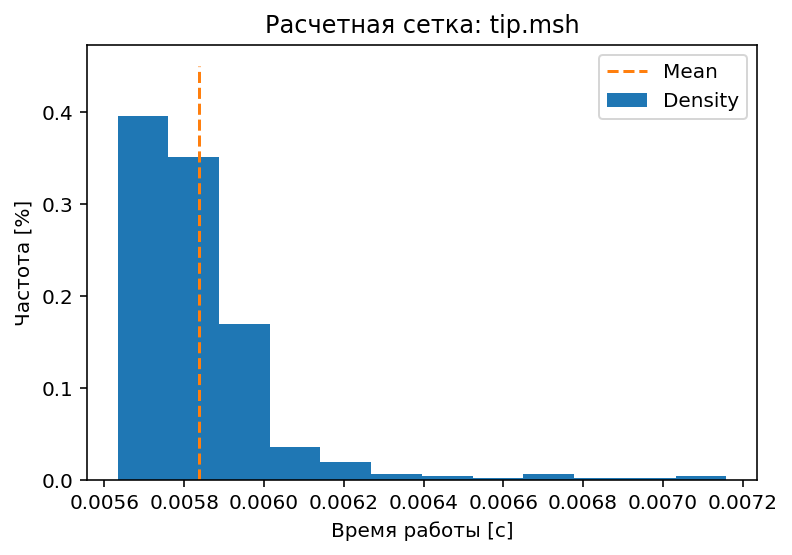

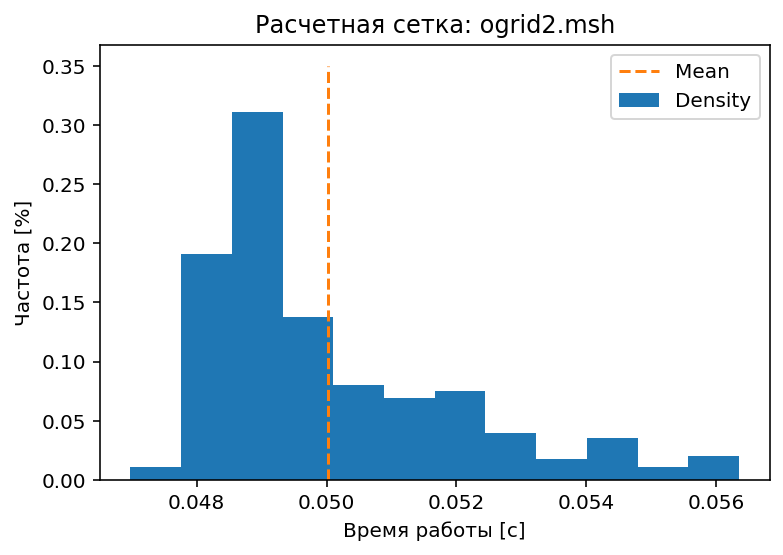

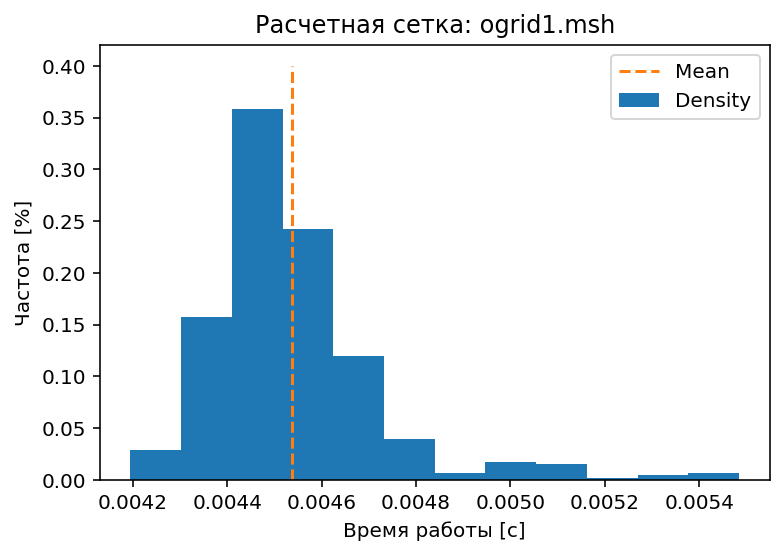

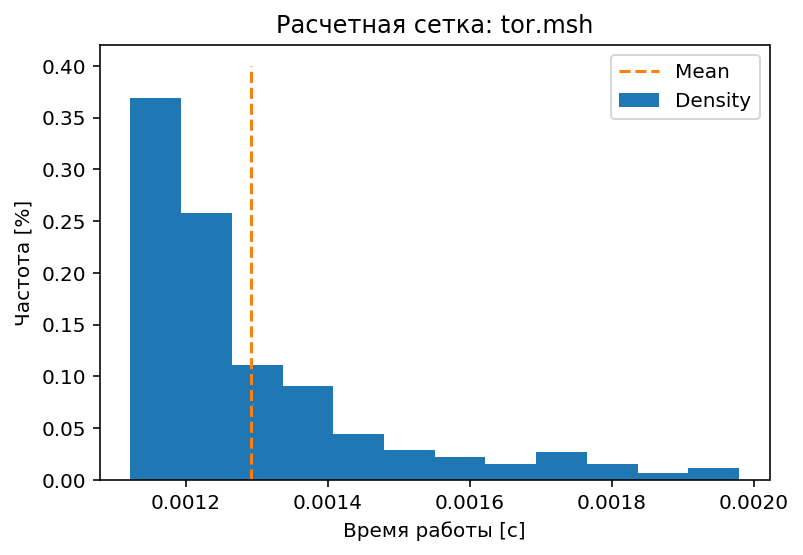

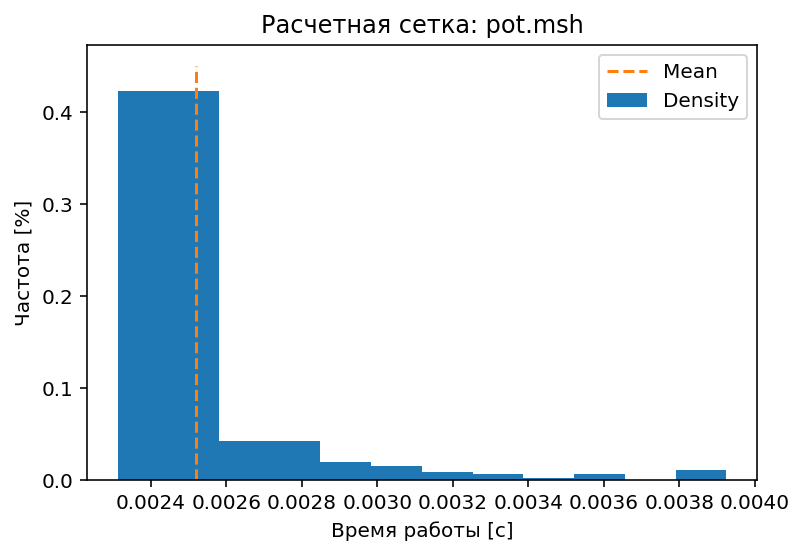

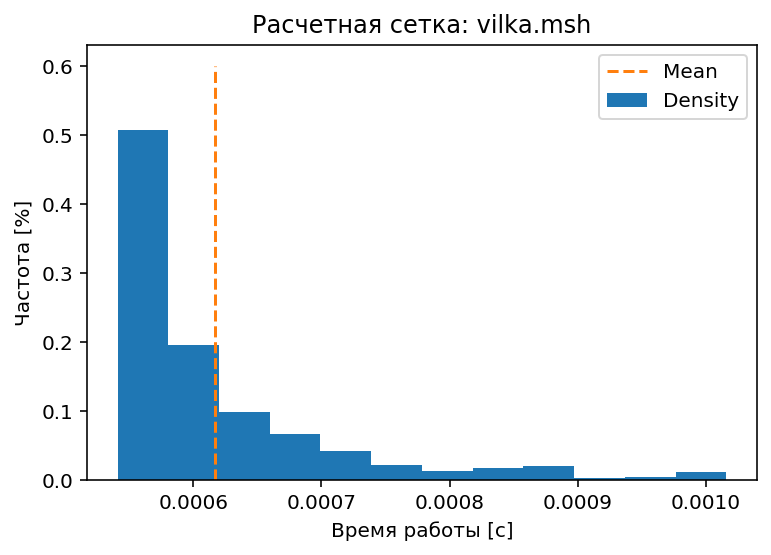

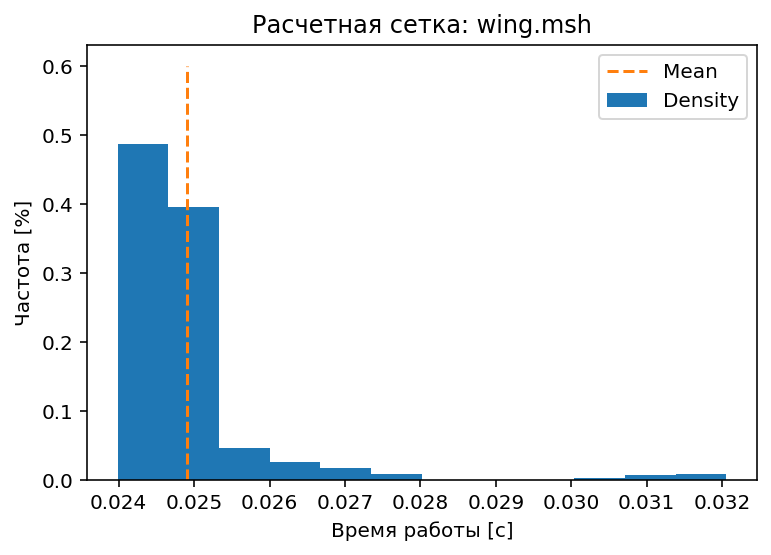

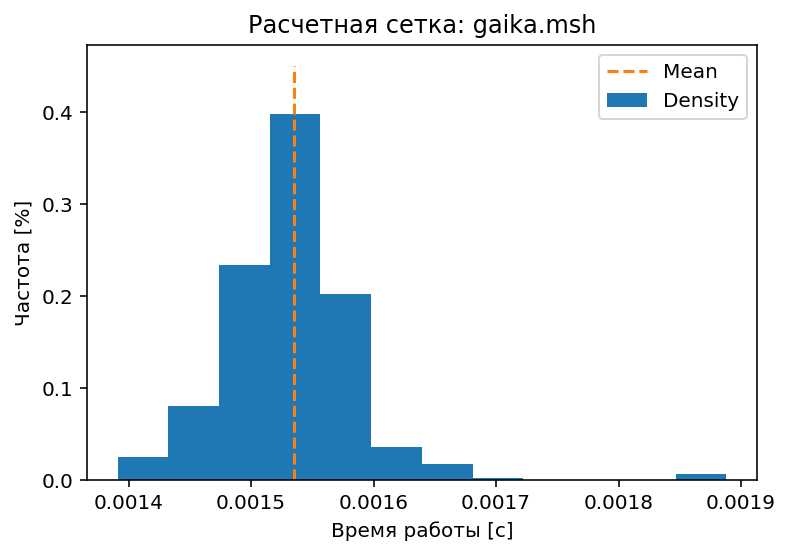

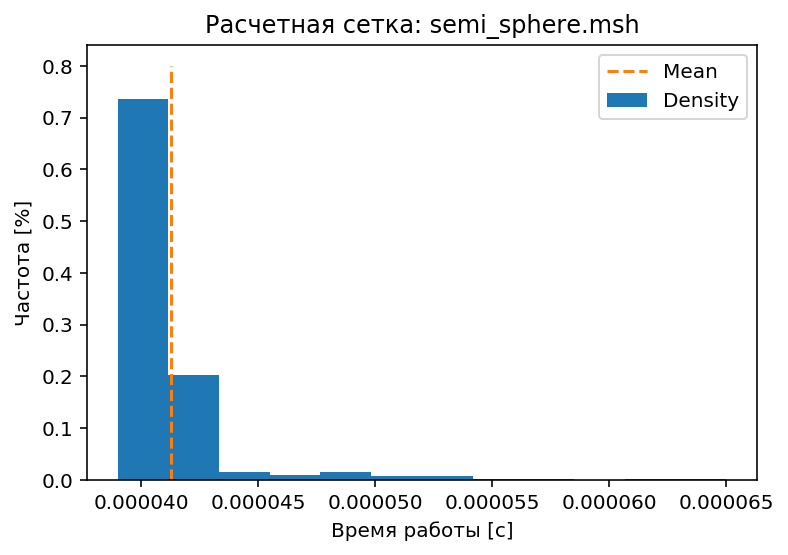

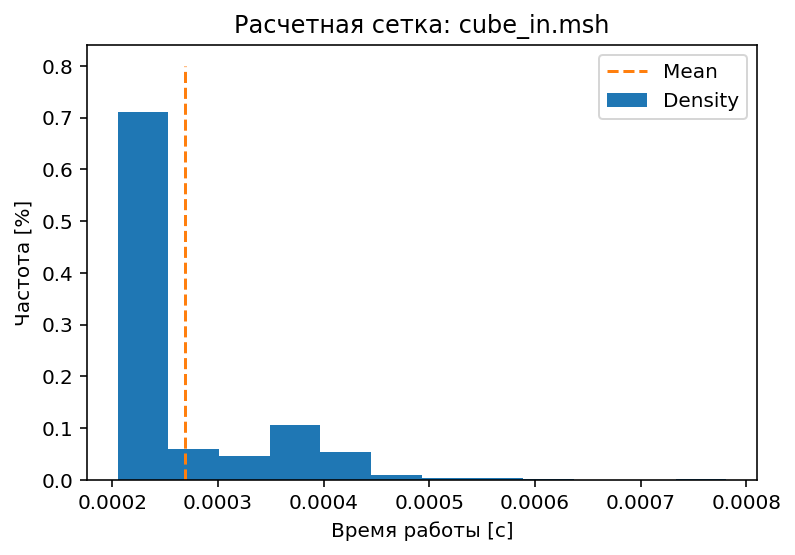

In [13]:
benchmarks_files = os.listdir("benchmarks450/")
benchmarks_files = filter(lambda x: x != "args.txt", benchmarks_files)

benchmarks_meta = []


for benchmark_file in benchmarks_files:
    seconds = []
    with open(f"benchmarks/{benchmark_file}", "r") as file_in:
        lines = file_in.readlines()
        
        name = lines[0].strip()
        lines = filter(lambda x: x != "\n", lines)
        n_hexas = 0
        for line in lines:
            if "Running time in ms:" in line:
                time_ = line.split(":")[1].strip()
                time_ = int(time_[:-1]) # cut 't'
                time_ = time_ / 1e6 # to seconds
                seconds.append(time_)
            elif "Number of hexas:" in line:
                n_hexas = int(line.split(":")[1].strip())
                   
    sec_pd = pd.Series(seconds)
    sec_pd.name = 'Density'
    fig = plt.figure()
    
    ax = sec_pd.plot.hist(bins=12, weights = np.ones_like(sec_pd.index) / len(sec_pd.index))
    
    mu = sec_pd.mean()
    std = sec_pd.std()
    
    benchmark_file = benchmark_file.replace("_radmir", "")
    
    ax.set_title(f"Расчетная сетка: {benchmark_file.split('.')[0]}.msh")
    ax.set_ylabel("Частота [%]")
    ax.set_xlabel("Время работы [с]")
    
    mean_line = ax.plot([mu]*len(plt.yticks()[0]), plt.yticks()[0], label='Mean', linestyle='--')
    plt.legend(loc="upper right")
    # fig = ax.get_figure()
    fig.savefig(f"histograms/{benchmark_file.split('.')[0]}_mu={mu}_std={std}.eps", format='eps')
    
    benchmarks_meta.append([
        f"{benchmark_file.split('.')[0]}.msh",
        sec_pd.shape[0],
        n_hexas,
        mu,
        std
    ])

In [17]:
meta = pd.DataFrame(benchmarks_meta, columns=['name', 'n_experiments', 'n_hexas', 'mu', 'std'])
meta

,name,n_experiments,n_hexas,mu,std
0,tip.msh,450,24000,0.005836,0.000186
1,ogrid2.msh,450,199000,0.050028,0.001944
2,ogrid1.msh,450,17575,0.004537,0.000184
3,tor.msh,450,4695,0.001292,0.000172
4,pot.msh,450,10080,0.002519,0.000243
5,vilka.msh,450,2259,0.000617,0.000088
6,wing.msh,450,101100,0.024905,0.001050
7,gaika.msh,450,6338,0.001535,0.000053
8,semi_sphere.msh,450,166,0.000041,0.000003
9,cube_in.msh,450,1000,0.000268,0.000075


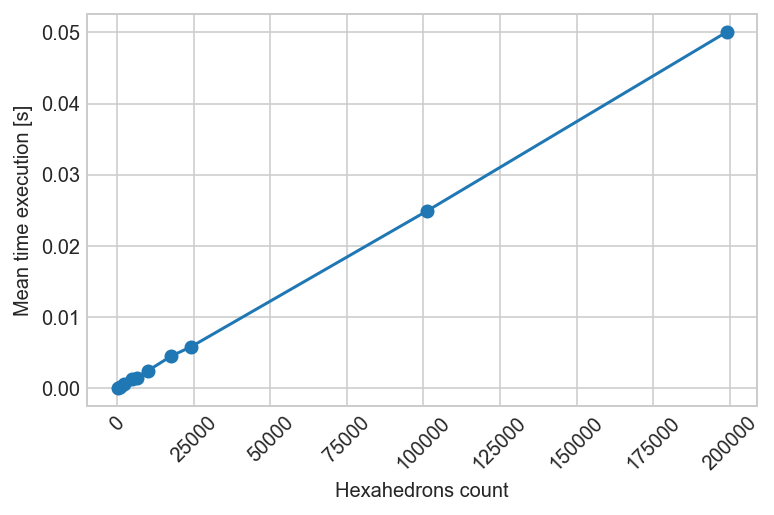

In [77]:
dat = meta[["n_hexas", "mu"]].values
x = dat[:,0]
y = dat[:,1]
s = sorted(zip(x, y), key=lambda x: x[0])
x, y = zip(*s)
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

plt.plot(x, y, marker='o')
plt.xticks(rotation=45)

# plt.title("Зависимость среднего времени выполнения")
plt.ylabel("Mean time execution [s]")
plt.xlabel("Hexahedrons count")
plt.gcf().subplots_adjust(bottom=0.20)

fig.savefig("histograms/Зависимость.eps", format='eps')

In [50]:
import scipy.stats
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)